<a href="https://colab.research.google.com/github/Julianpucheta/OptimalControl/blob/main/Example_Ref.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
!apt install octave

Reading package lists... Done
Building dependency tree       
Reading state information... Done
octave is already the newest version (4.2.2-1ubuntu1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [14]:
!apt-get update

Hit:1 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:7 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:8 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:9 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:12 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Reading package lists... Done


In [10]:
%%writefile Controlador.m
%Example extracted from: Sontag. Mathematical control theory 1998. Pag 104. http://www.sontaglab.org.
clc;clear all; clc;clear all;%close all;
m=.1;Fricc=0.1; long=0.6;g=9.8;M=.5;
h=0.001;tiempo=(2.0/h);p_pp=0;tita_pp=0; t=0:h:tiempo*h;
%Condiciones iniciales
% alfa(1)=.5; color='.g';
%alfa(1)=.97; color='b';
alfa(1)=-3.14; color='r';
ref=0;
%Example extracted from: Sontag. Mathematical control theory 1998. Pag 104. http://www.sontaglab.org.
clc;clear all;
m=.1;Fricc=0.1; long=0.6;g=9.8;M=.5;
h=0.001;tiempo=(120/h);tita_pp=0;t=0:h:tiempo*h;
%Condiciones iniciales
alfa(1)=.15; color='g';
alfa(1)=2.97; color='b';
% alfa(1)=3.14; color='r';
ref=100;
omega(1)=0; p_p(1)=0; u(1)=0; p(1)=0; i=1;indice=0;
%Versión linealizada en el equilibrio inestable. Sontag Pp 104.
% estado=[p(i); p_p(i); alfa(i); omega(i)]
Mat_A=[0 1 0 0;0 -Fricc/M -m*g/M 0; 0 0 0 1; 0 Fricc/(long*M) g*(m+M)/(long*M) 0];
Mat_B=[0; 1/M; 0; -1/(long*M)];
Mat_C=[1 0 0 0]; %La salida monovariable es posición
% Construcción del sistema ampliado
Mat_Aa=[Mat_A zeros(4,1);-Mat_C 0];
Mat_Ba=[Mat_B;0];
% Mat_M=[Mat_B Mat_A*Mat_B Mat_A^2*Mat_B Mat_A^3*Mat_B];%Matriz Controlabilidad
Mat_M=[Mat_Ba Mat_Aa*Mat_Ba Mat_Aa^2*Mat_Ba Mat_Aa^3*Mat_Ba Mat_Aa^4*Mat_Ba];%Matriz Controlabilidad
%Cálculo del controlador por asignación de polos
%autovalores ecuacion caracteriatica de A lazo abierto
auto_val=eig(Mat_Aa);
c_ai=conv(conv(conv(conv([1 -auto_val(1)],[1 -auto_val(2)]),[1 -auto_val(3)]),[1 -auto_val(4)]),[1 -auto_val(5)]); %= poly(eig(Mat_A))
% c_ai=poly(auto_val);
Mat_W=[c_ai(5) c_ai(4) c_ai(3) c_ai(2) 1;
    c_ai(4) c_ai(3) c_ai(2) 1 0;
    c_ai(3) c_ai(2) 1 0 0;
    c_ai(2) 1 0 0 0;
    1 0 0 0 0];
Mat_T=Mat_M*Mat_W;
A_controlable=inv(Mat_T)*Mat_Aa*Mat_T; %Verificación de que T esté bien
% 1.0000e+00 1.0724e+01 3.7126e+01 4.8193e+01 3.2590e+01 1.0330e+01 alfa_ia=[1.0000e+00 1.0724e+01 3.7126e+01 4.8193e+01 3.2590e+011.0330e+01];%Ec caract deseadapol=fliplr(alfa_ia(2:6)-c_ai(2:6));
a5=-A_controlable(5,1);%a5
a4=-A_controlable(5,2);%a4
a3=-A_controlable(5,3);
a2=-A_controlable(5,4);
a1=-A_controlable(5,5);
R=100;
q5=100000;
q4=100000;
q3=10000;
q2=1000;
q1=10;
Q=diag([q1 q2 q3 q4 q5]);
p1=.5*(-4*a5*R+sqrt((4*a5*R)^2+16*q1*R));
p2=.5*(-4*a4*R+sqrt((4*a4*R)^2+16*q2*R));
p3=.5*(-4*a3*R+sqrt((4*a3*R)^2+16*q3*R));
p4=.5*(-4*a2*R+sqrt((4*a2*R)^2+16*q4*R));
p5=.5*(-3*a1*R+sqrt((3*a1*R)^2+ 8*q5*R));
%
% p1=.5*(-4*a5*R-sqrt((4*a5*R)^2+16*q1*R));
% p2=.5*(-4*a4*R-sqrt((4*a4*R)^2+16*q2*R));
% p3=.5*(-4*a3*R-sqrt((4*a3*R)^2+16*q3*R));
% p4=.5*(-4*a2*R-sqrt((4*a2*R)^2+16*q4*R));
% p5=.5*(-3*a1*R-sqrt((3*a1*R)^2+ 8*q5*R));
Ka=(([p1 p2 p3 p4 p5])/(2*R))*inv(Mat_T);
% [Ka,S,E]=lqr(Mat_Aa,Mat_Ba,Q,R);
H=[Mat_Aa -Mat_Ba*inv(R)*Mat_Ba'
    -Q -Mat_Aa'];
[V,D]=eig(H);MX1X2=[];
for(ii=1:10)
    if real(D(ii,ii))<0
        MX1X2=[MX1X2 V(:,ii)];
    end
end
MX1=MX1X2(1:5,:); MX2=MX1X2(6:10,:);
P=real(MX2*inv(MX1));
% Ka=inv(R)*Mat_Ba'*P;
K=Ka(1:4); KI=-Ka(5);
eig(Mat_Aa-Mat_Ba*Ka)% break
x_hat=[0 0 0 0]';Jn(1)=0;
T_CI=4;
Mat_datop=zeros(2,tiempo+1);
Mat_datop_p=zeros(2,tiempo+1);
Mat_datoalfa=zeros(2,tiempo+1);
Mat_datoomega=zeros(2,tiempo+1);
Mat_datou=zeros(2,tiempo+1);
hfig2 = figure(2); set(hfig2, 'Visible', 'off');hold on;
for ci =1:T_CI
    x_hat=[0 0 0 0]';Jn(1)=0;
    ref=0;
    omega(1)=0; p_p(1)=0; u(1)=0; p(1)=0; i=1;indice=0;
    switch (ci)
        case 1
            alfa(1)=-pi;color='k';
        case 2
            alfa(1)=.6;color='r';
        case 3
            alfa(1)=-.6;color='g';
        case 4
            alfa(1)=pi;color='b';
    end
    Mat_datop(ci,1)=p(1);
    Mat_datop_p(ci,1)=p_p(1);
    Mat_datoalfa(ci,1)=alfa(1);
    Mat_datoomega(ci,1)=omega(1);
    Mat_datou(ci,1)=u(1);
    % eig(Mat_A-Mat_B*K)
    % break
    while(i<(tiempo+1))
        estado=[p(i); p_p(i); alfa(i); omega(i)];
        psi_p=ref-Mat_C*estado;
        psi(i+1)=psi(i)+psi_p*h;
        u(i)=-K*estado+KI*psi(i+1);
        % u(i)=max(-2000,u(i));u(i)=min(2000,u(i));
        p_pp=(1/(M+m))*(u(i)-m*long*tita_pp*cos(alfa(i))+m*long*omega(i)^2*sin(alfa(i))-Fricc*p_p(i));
        tita_pp=(1/long)*(g*sin(alfa(i))-p_pp*cos(alfa(i)));
        p_p(i+1)=p_p(i)+h*p_pp;
        p(i+1)=p(i)+h*p_p(i);
        omega(i+1)=omega(i)+h*tita_pp;
        alfa(i+1)=alfa(i)+h*omega(i);
        y_sal(i)=Mat_C*estado;
        Jn(i+1)=Jn(i)+x_hat'*Q(1:4,1:4)*x_hat+u(i)'*R*u(i);
        i=i+1;
    end
    u(i)=-K*estado+KI*psi(i);    
    Mat_datop(ci,:)=p;
    Mat_datop_p(ci,:)=p_p;
    Mat_datoalfa(ci,:)=alfa;
    Mat_datoomega(ci,:)=omega;
    Mat_datou(ci,:)=u;
    subplot(2,2,1);plot(alfa,omega,color);grid on;xlabel('Angle');ylabel('Angle velocity');hold on;
    subplot(2,2,2);plot(p,p_p,color);grid on;xlabel('Cart position');ylabel('Cart velocity');hold on;
end
print(hfig2,'Pendulo_fase','-dpng');
hfig1 = figure(1); set(hfig1, 'Visible', 'off');
subplot(3,2,1);plot(t,Mat_datop);grid on; title('Cart position');hold on;
subplot(3,2,2);plot(t,Mat_datoalfa);grid on;title('Angle');hold on;
subplot(3,2,3); plot(t,Mat_datop_p);grid on;title('Cart velocity');hold on;
subplot(3,2,4);plot(t,Mat_datoomega);grid on;title('Angle velocity');hold on;
subplot(3,1,3);plot(t,Mat_datou);grid on;title('Force action');xlabel('Time Sec.');hold on;
print(hfig1,'Pendulo_t','-dpng');
save('Datos_Controlador.mat','-v7')

Overwriting Controlador.m


In [11]:
# -W : no window system
!octave -W Controlador.m
#·import scipy.io
#mat = scipy.io.loadmat('/content/Datos_Controlador.mat')


ans =

  -20.63233 +  0.00000i
   -1.50828 +  0.00000i
   -0.06851 +  0.26720i
   -0.06851 -  0.26720i
   -0.13355 +  0.00000i

Some output formats are not available.
    __print_parse_opts__ at line 388 column 9
    print at line 316 column 8
    Controlador at line 135 column 1


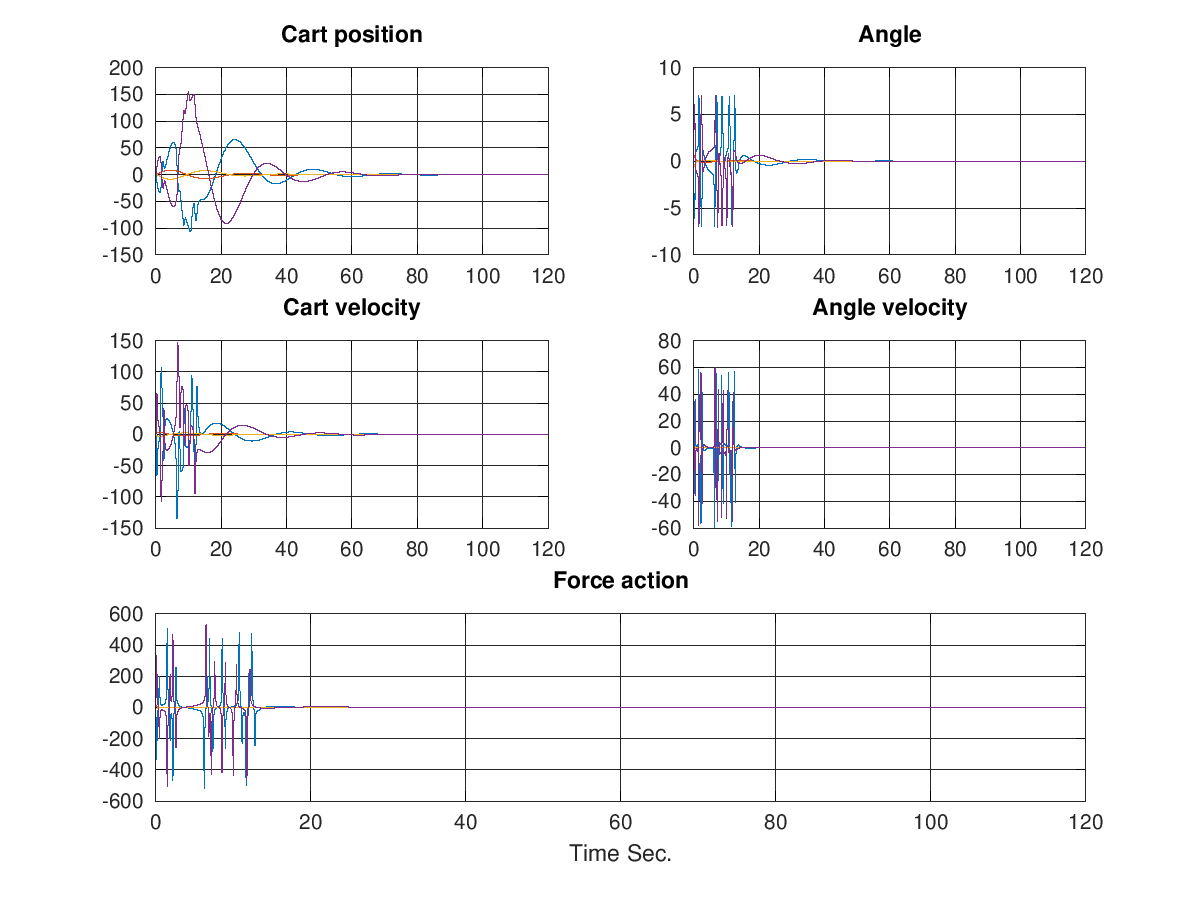

In [12]:
from PIL import Image
imt = Image.open("/content/Pendulo_t.png")

imt


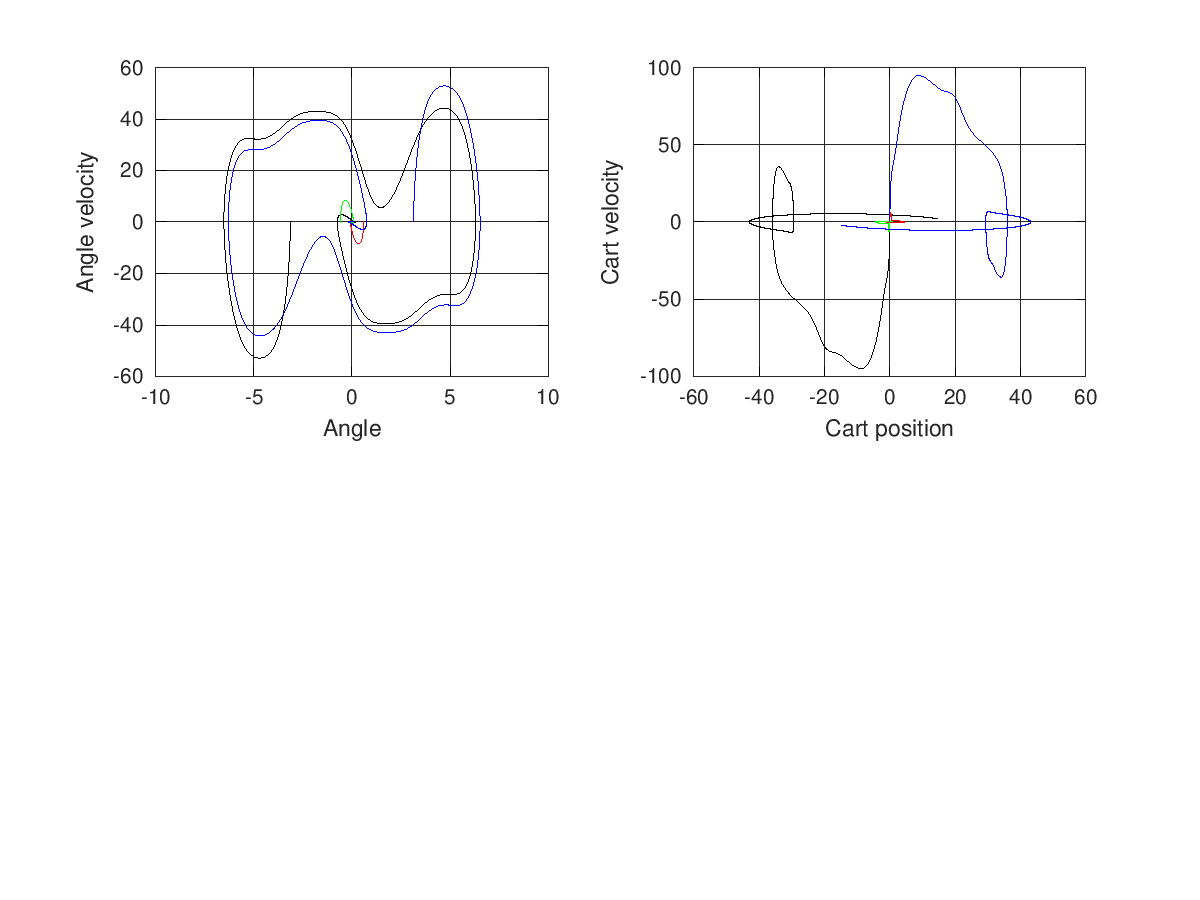

In [ ]:
imf = Image.open("/content/Pendulo_fase.png")

imf